In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_episode(states):
    episode = []
    k = len(states)//2 # start node index
    try:
        while states[k] not in terminals:
            episode.append(states[k])
            action = -1 if random.randint(0, 1) else 1
            k += action
    finally:
        episode.append(states[k])
    return episode

def gen_episodes(states, trials):
    episodes = []
    for n in range(trials):
        episodes.append(gen_episode(states))
    return episodes

def initialize(states):
    vals_dic = {}
    for state in states:
        if state not in terminals:
            vals_dic[state]=0.5
        else:
            vals_dic[state]=0
    return vals_dic

def value_iteration(eps, vals_dic, alpha):
    for t in range(0, len(eps)-1):
        new_val = vals_dic[eps[t]]+alpha*(reward(eps[t+1])+vals_dic[eps[t+1]]-vals_dic[eps[t]])
        vals_dic[eps[t]]=new_val

def reward(state):
    if state == 'rterm':
        return 1.
    else:
        return 0.

In [3]:
states = ['lterm', 'A', 'B', 'C', 'D', 'E', 'rterm']
terminals = ('lterm', 'rterm')
values_dic1 = initialize(states)
values_dic10 = initialize(states)
values_dic100 = initialize(states)

In [4]:
episodes1 = gen_episodes(states, 1)
episodes10 = gen_episodes(states, 10)
episodes100 = gen_episodes(states, 100)

for episode in episodes1:
	value_iteration(episode, values_dic1, 0.1)
for episode in episodes10:
	value_iteration(episode, values_dic10, 0.1)
for episode in episodes100:
	value_iteration(episode, values_dic100, 0.1)

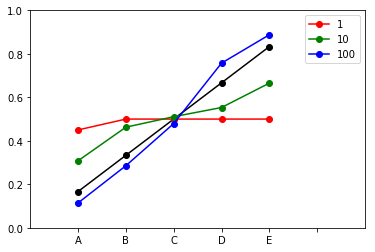

In [5]:
plt.plot([1/6., 2/6., 3/6., 4/6., 5/6.], 'ko-')
plt.plot([values_dic1[x] for x in states[1:-1]], 'ko-', color='r', label='1')
plt.plot([values_dic10[x] for x in states[1:-1]], 'ko-', color='g', label='10')
plt.plot([values_dic100[x] for x in states[1:-1]], 'ko-', color='b', label='100')
plt.xticks(range(6), states[1:-1])
plt.ylim([0,1])
plt.xlim([-1, 6])
plt.legend(loc='best')